In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.rename(columns={'Genre':"Gender"}, inplace=True)

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: ylabel='Age'>

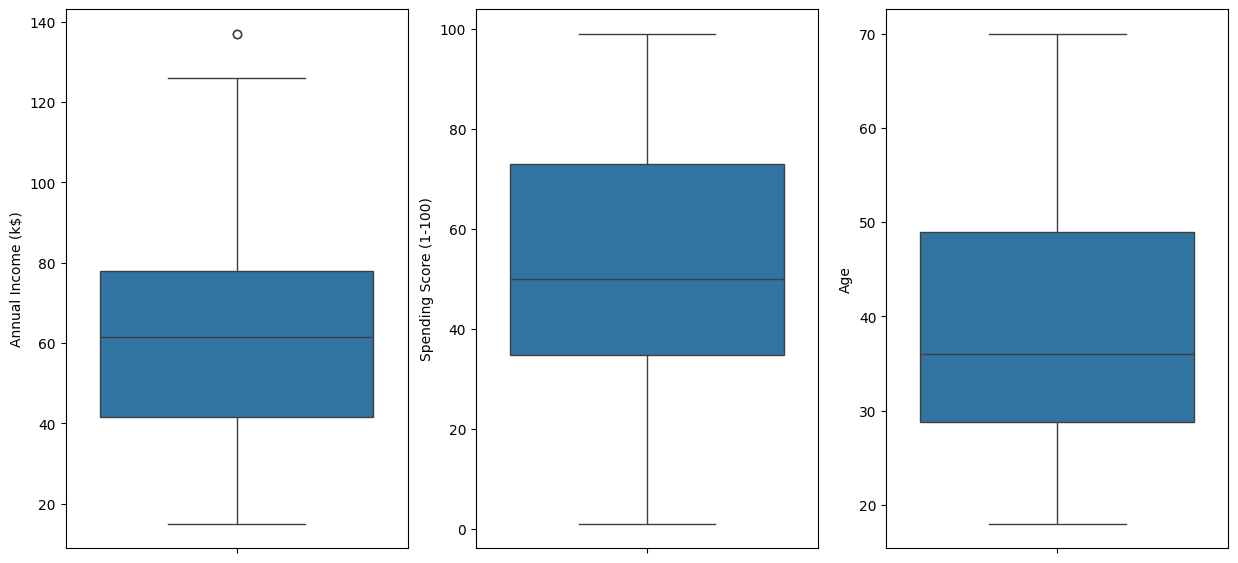

In [5]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.boxplot(data = df, y = "Annual Income (k$)")

plt.subplot(1, 3, 2)
sns.boxplot(data = df, y = "Spending Score (1-100)")

plt.subplot(1, 3, 3)
sns.boxplot(data = df, y = "Age")

In [6]:
df.drop("CustomerID", axis = 1, inplace=True)

Text(0, 0.5, 'Density')

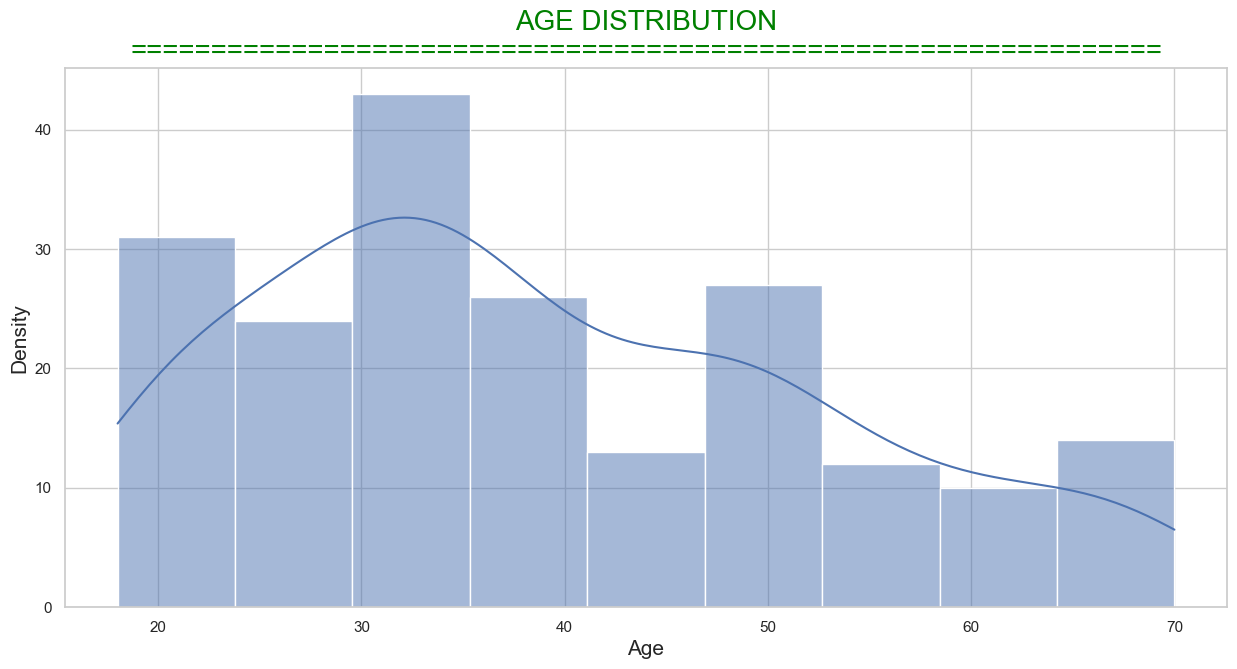

In [7]:
#Checking the Age distribution
plt.figure(figsize = (15, 7))
sns.set(style = "whitegrid")

sns.histplot(df["Age"], kde=True)
plt.title("AGE DISTRIBUTION\n================================================================", fontsize=20, color = "green")
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Density", fontsize = 15)

Text(0, 0.5, 'Density')

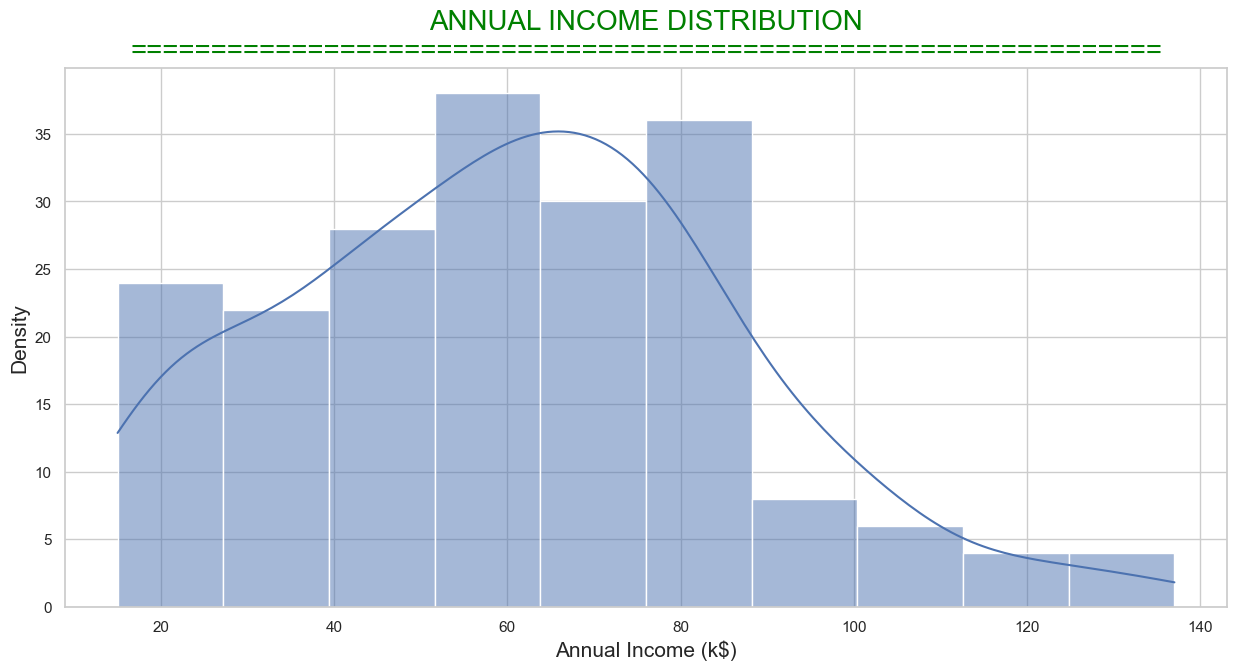

In [8]:
#Checking the Annual Income distribution
plt.figure(figsize = (15, 7))
sns.set(style = "whitegrid")

sns.histplot(df["Annual Income (k$)"], kde=True)
plt.title("ANNUAL INCOME DISTRIBUTION\n================================================================", fontsize=20, color = "green")
plt.xlabel("Annual Income (k$)", fontsize = 15)
plt.ylabel("Density", fontsize = 15)

Text(0, 0.5, 'Density')

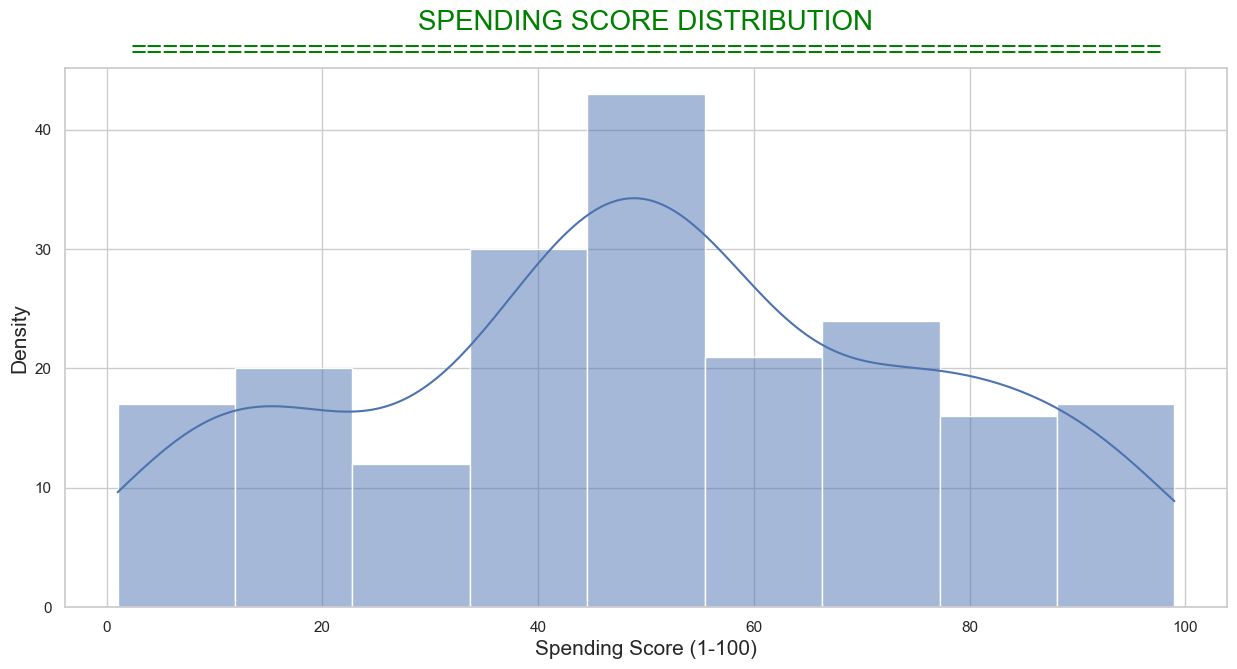

In [9]:
#Checking the Spending Score distribution
plt.figure(figsize = (15, 7))           
sns.set(style = "whitegrid")

sns.histplot(df["Spending Score (1-100)"], kde=True)
plt.title("SPENDING SCORE DISTRIBUTION\n================================================================", fontsize=20, color = "green")
plt.xlabel("Spending Score (1-100)", fontsize = 15)    
plt.ylabel("Density", fontsize = 15)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22764\41352857.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Gender"], palette="pastel")


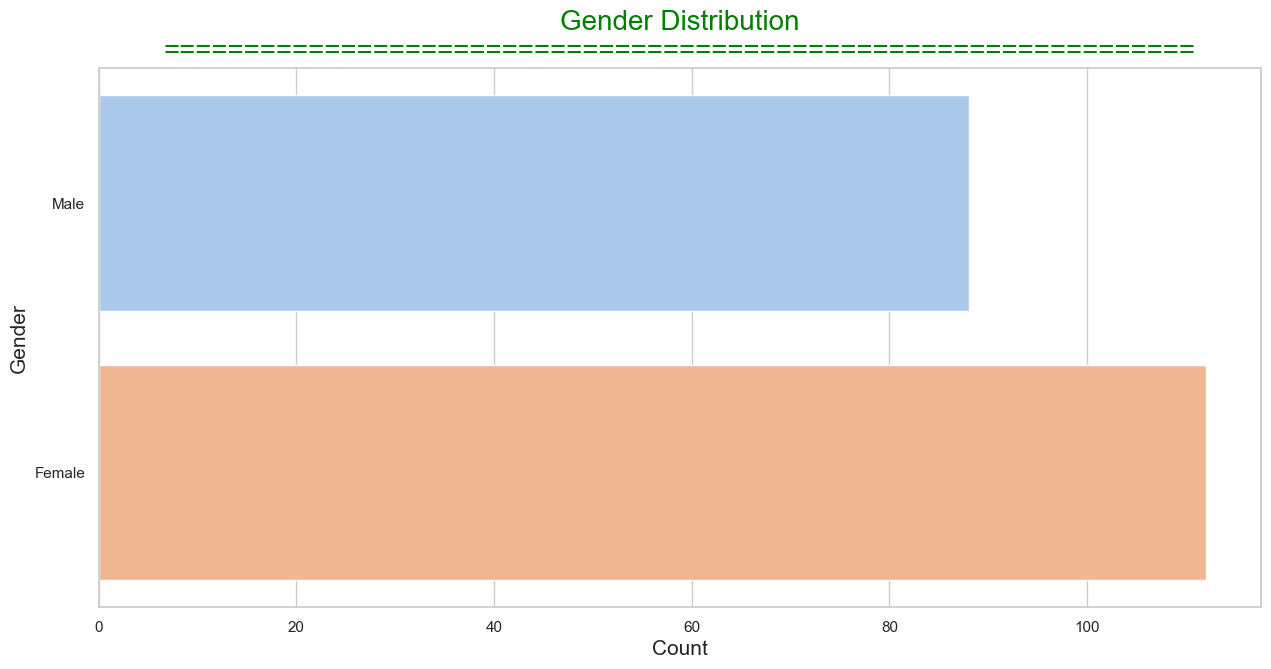

In [10]:
plt.figure(figsize=(15, 7))
sns.set(style = "whitegrid")

plt.title("Gender Distribution\n================================================================", fontsize=20, color = "green")
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Gender", fontsize = 15)
sns.countplot(df["Gender"], palette="pastel")
plt.show()

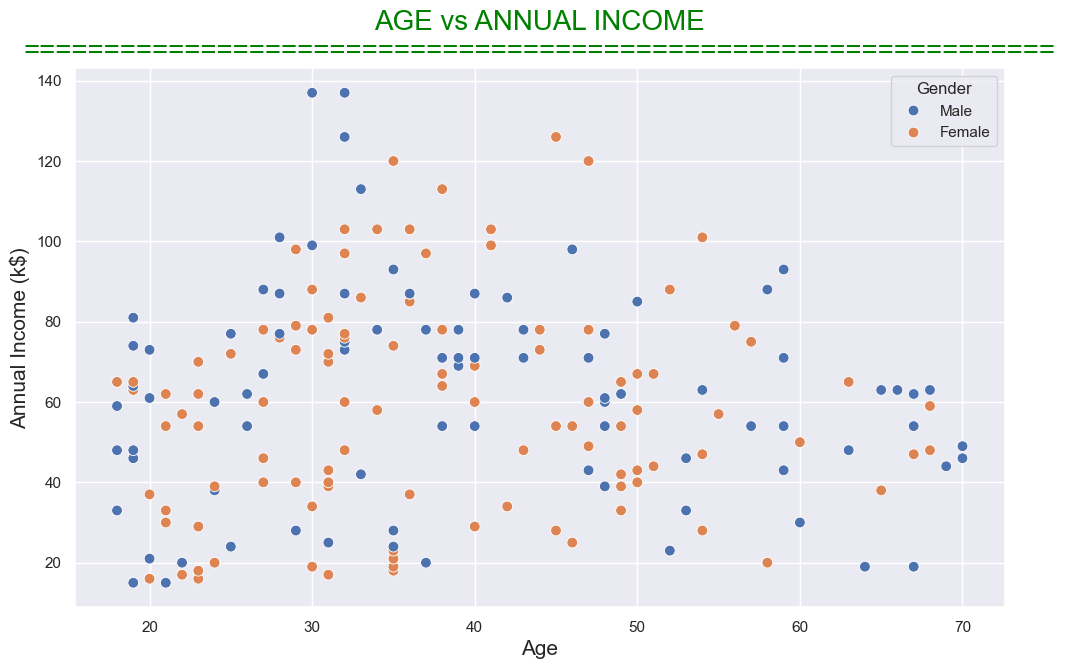

In [11]:
#Age vs Annual Income
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue = 'Gender', s = 60)
plt.title("AGE vs ANNUAL INCOME\n================================================================", fontsize=20, color = "green")
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Annual Income (k$)", fontsize = 15)
plt.show()

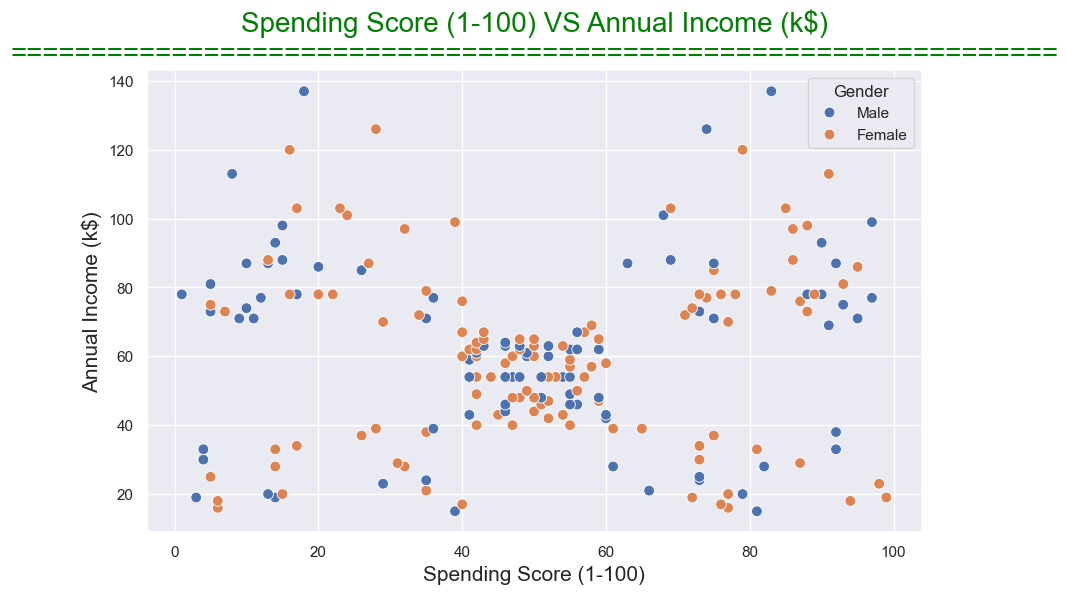

In [12]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Spending Score (1-100) VS Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

Binning - Age, Income and Spending Score

C:\Users\Admin\AppData\Local\Temp\ipykernel_22764\3751553815.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="nipy_spectral_r")


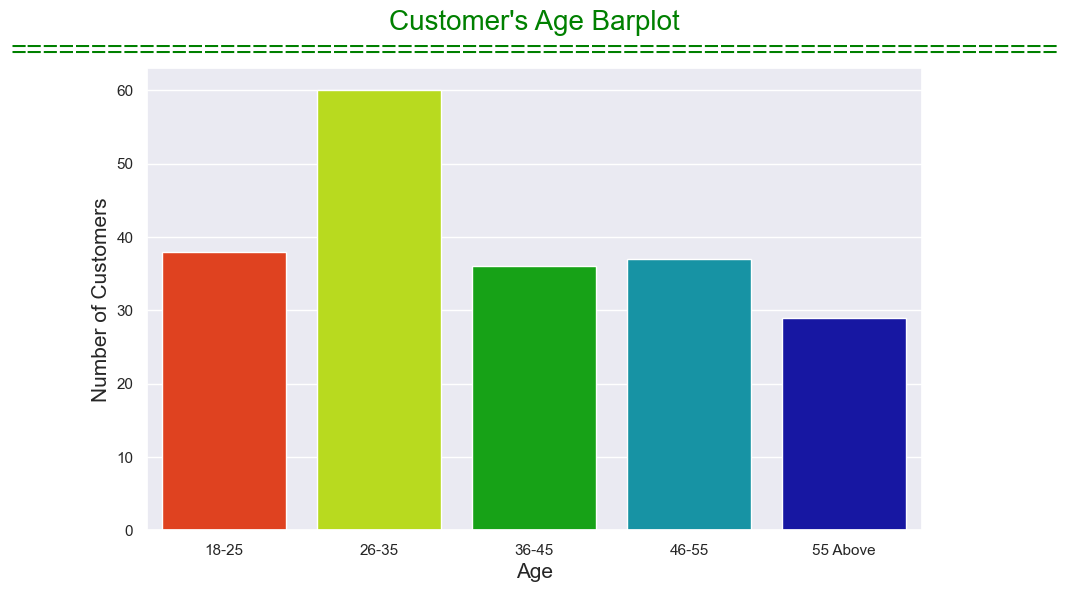

In [13]:
Age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
Age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
Age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
Age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
Age_55_Above = df.Age[(df.Age>=56)]

x = ["18-25","26-35","36-45","46-55","55 Above"]
y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customer's Age Barplot\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22764\2757975136.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")


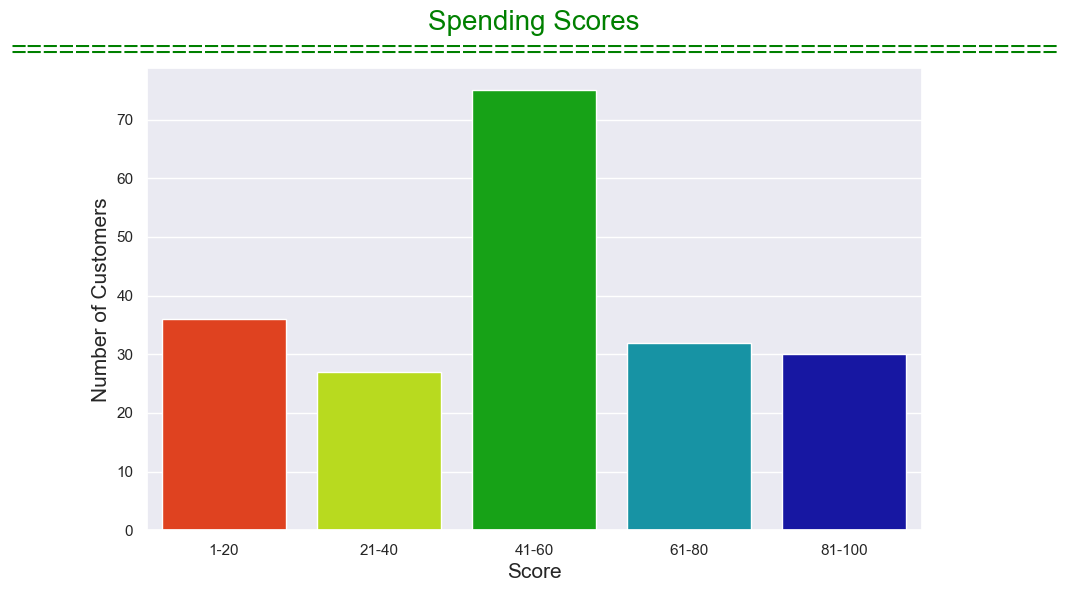

In [14]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores\n=================================================================", fontsize=20, color="green")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22764\1963051489.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")


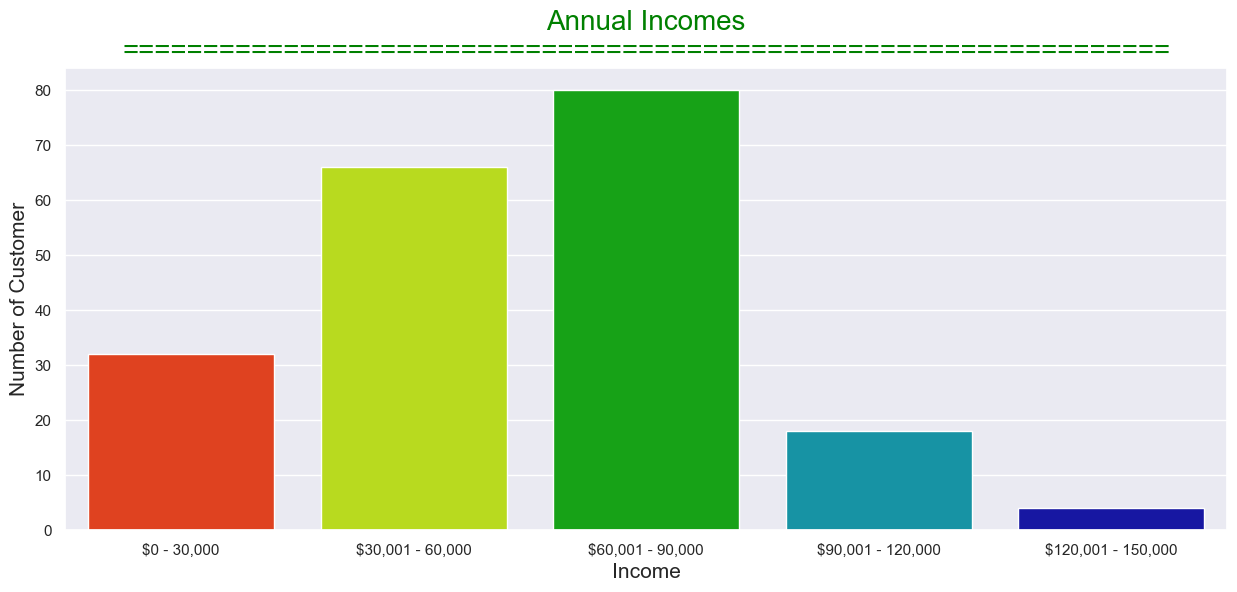

In [15]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes\n=================================================================", fontsize=20, color="green")
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

RESCALING

In [18]:
df_scaled = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()

df_scaled_fit = scaler.fit_transform(df_scaled)

In [19]:
print(type(df_scaled_fit))
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
print(df_scaled_fit.head())
print(type(df_scaled_fit))

<class 'numpy.ndarray'>
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980
<class 'pandas.core.frame.DataFrame'>


GOING WITH 2 FEATURES ONLY (INCOME AND SPENDING SCORE)

In [20]:
df2 = df_scaled_fit[["Annual Income (k$)", "Spending Score (1-100)"]]
display(df2)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


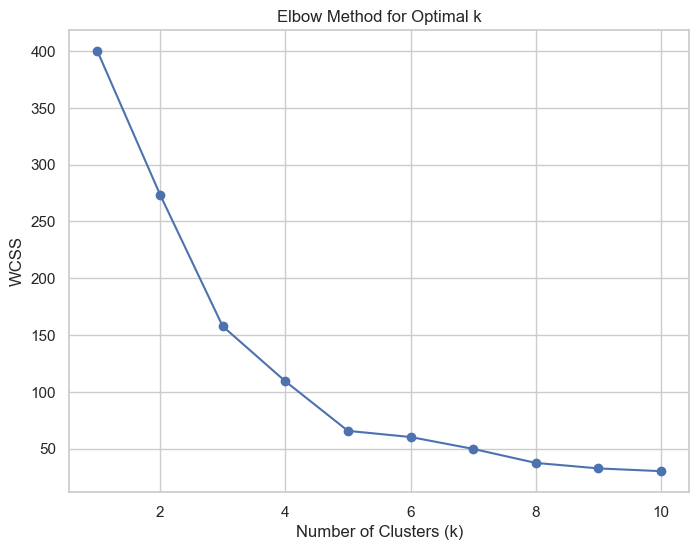

In [21]:
wcss = []

# Try k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)  # WCSS

# Plot the elbow
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
df2["Cluster"] = kmeans.fit_predict(df2)

In [23]:
df["Cluster"] = df2["Cluster"]
display(df)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


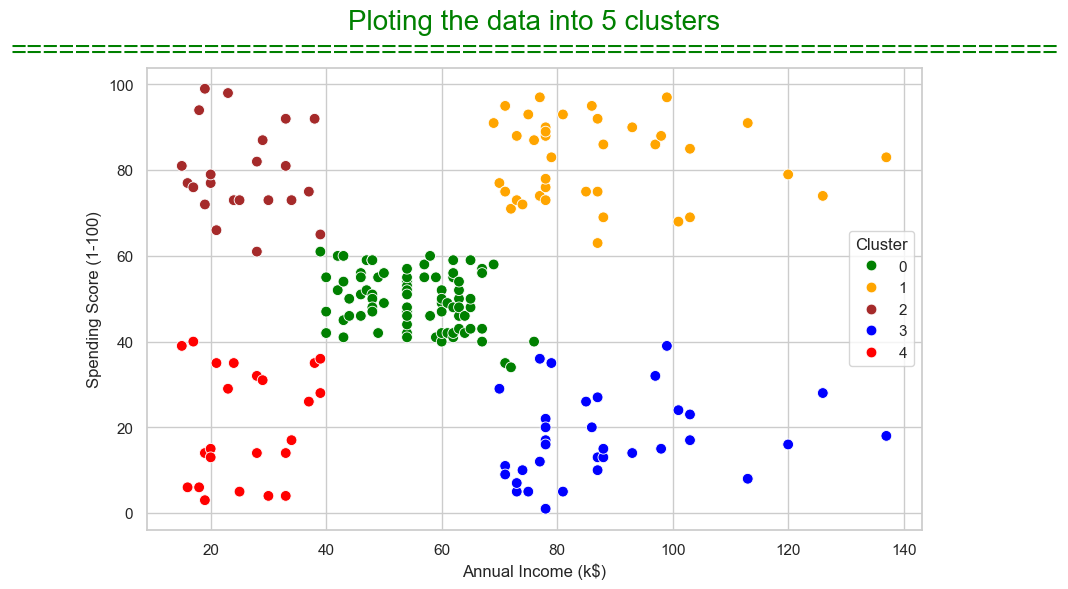

In [24]:
plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22764\43489618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette=['green','orange','brown','blue','red'])


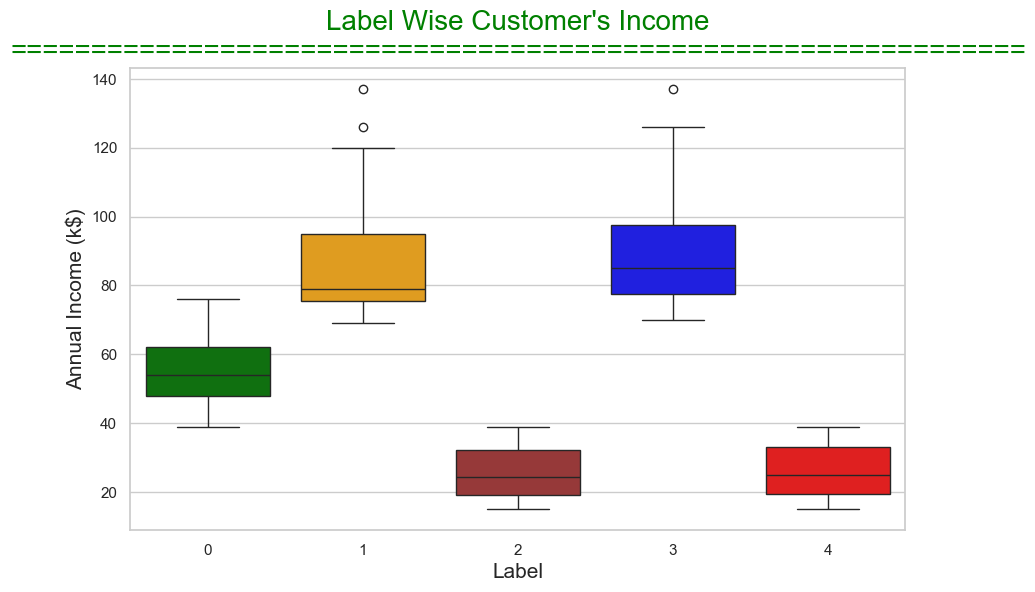

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette=['green','orange','brown','blue','red'])
plt.title("Label Wise Customer's Income\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=15)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22764\3976659850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette=['green','orange','brown','blue','red'])


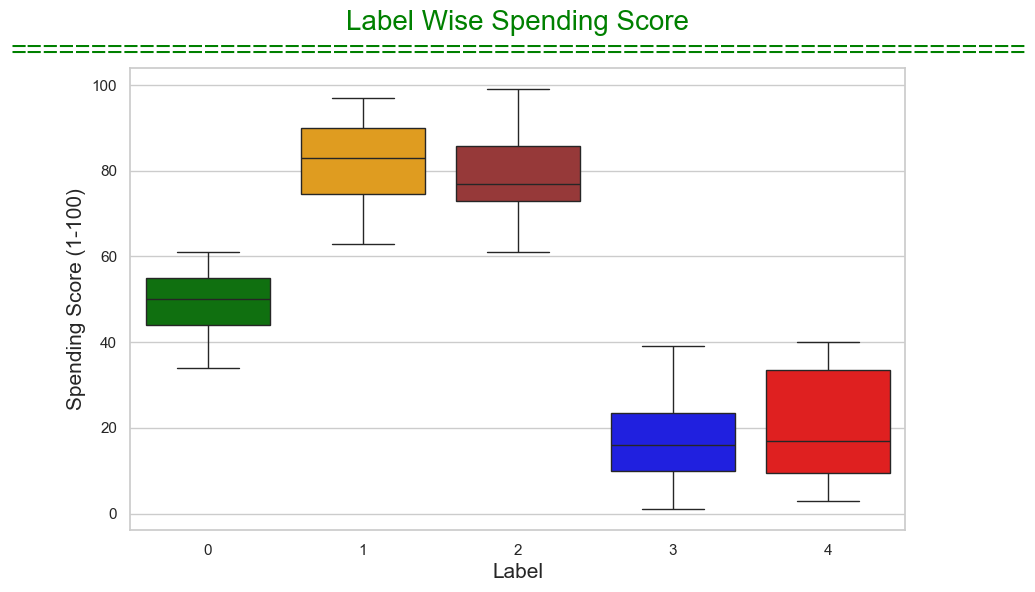

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette=['green','orange','brown','blue','red'])
plt.title("Label Wise Spending Score\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Spending Score (1-100)",fontsize=15)
plt.show()

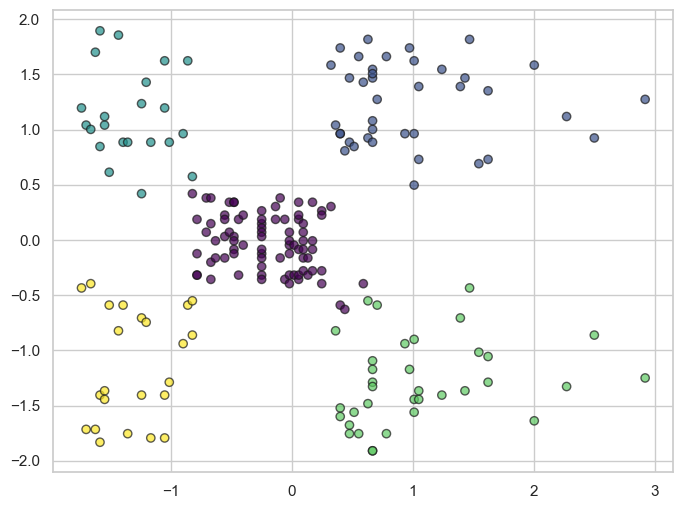

In [27]:

plt.figure(figsize=(8,6))

# Scatter plot of each point
plt.scatter(
    df2["Annual Income (k$)"], 
    df2["Spending Score (1-100)"], 
    c=df2["Cluster"], 
    cmap="viridis",  # nice color map
    alpha=0.7,
    edgecolor="k"
)

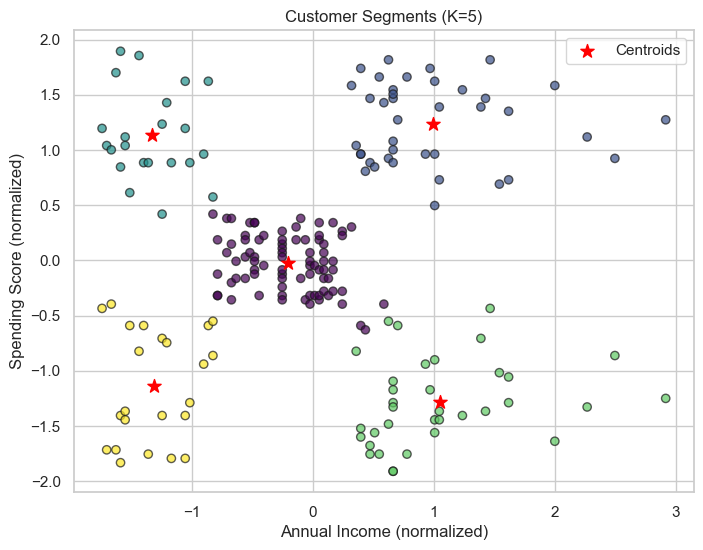

In [28]:
plt.figure(figsize=(8,6))

# Scatter plot of each point
plt.scatter(
    df2["Annual Income (k$)"], 
    df2["Spending Score (1-100)"], 
    c=df2["Cluster"], 
    cmap="viridis",  # nice color map
    alpha=0.7,
    edgecolor="k"
)


# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c="red", s=100, marker="*", label="Centroids"
)

plt.xlabel("Annual Income (normalized)")
plt.ylabel("Spending Score (normalized)")
plt.title("Customer Segments (K=5)")
plt.legend()
plt.show()

In [29]:
print(centers)

[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [30]:
# Group by cluster and get averages of original values
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


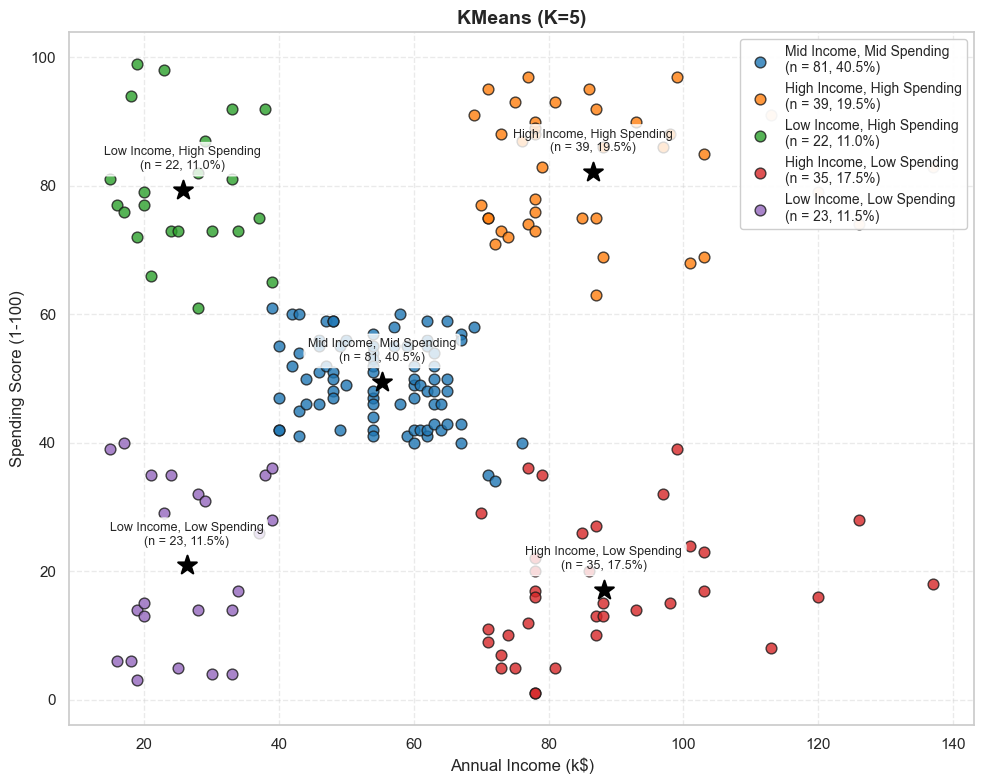

In [44]:
cluster_labels = {
    0: 'Mid Income, Mid Spending',
    1: 'High Income, High Spending',
    2: 'Low Income, High Spending',
    3: 'High Income, Low Spending',
    4: 'Low Income, Low Spending'
}

counts = df["Cluster"].value_counts().sort_index()
pct = (counts / counts.sum() * 100).round(2)

centers_original = (
    df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]]
    .mean()
    .reindex(range(5))   # ensure rows for clusters 0..4 in order
    .values #Chuyển bảng Pandas DataFrame thành mảng NumPy (chỉ chứa giá trị số, bỏ index và tên cột).
)

label_texts = {}
for i in range(5):
    base = cluster_labels.get(i, f"Cluster {i}")
    n = int(counts.get(i, 0)) #nếu cụm i không có dữ liệu thì trả về 0.
    p = pct.get(i, 0.0) #nếu cụm i không có dữ liệu thì trả về 0.0.
    label_texts[i] = f"{base}\n(n = {n}, {p}%)"

# --- plot each cluster separately with distinct colors for clarity ---
plt.figure(figsize=(10,8))
colors = plt.cm.tab10(np.arange(5))  # 5 distinct colors

for i in range(5):
    mask = df["Cluster"] == i
    plt.scatter(
        df.loc[mask, "Annual Income (k$)"],
        df.loc[mask, "Spending Score (1-100)"],
        s=60,
        alpha=0.8, # transparency
        edgecolor="k", #viền màu đen quanh điểm
        color=colors[i],
        label=label_texts[i]
    )

plt.scatter(centers_original[:, 0], centers_original[:, 1],
            marker="*", s=200, c="black", linewidths=1.5)

# --- annotate centroids (offset so text does not overlap markers) ---
for i, (x, y) in enumerate(centers_original):
    plt.annotate(
        label_texts[i],
        xy=(x, y),
        xytext=(0, 15),            # offset (x,y) by 15 points upward
        textcoords="offset points",
        ha="center",
        fontsize=9,
        bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.3")
    )

# --- styling ---
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans (K=5)", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper right", fontsize="small", framealpha=0.95)
plt.tight_layout()
plt.show()

DBSCAN

In [32]:
df_dbscan = df_scaled_fit[["Annual Income (k$)", "Spending Score (1-100)"]]
display(df_dbscan)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [33]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
labels = dbscan.fit_predict(df_dbscan)

print("Unique cluster labels and counts:")
print(np.unique(labels, return_counts=True))

Unique cluster labels and counts:
(array([-1]), array([200]))


In [34]:
for eps in np.arange(0.01, 0.2, 0.01):
    for min_samples in range(3, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_dbscan)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps:.2f}, min_samples={min_samples} --> clusters: {n_clusters}, noise: {n_noise}")

eps=0.01, min_samples=3 --> clusters: 0, noise: 200
eps=0.01, min_samples=4 --> clusters: 0, noise: 200
eps=0.01, min_samples=5 --> clusters: 0, noise: 200
eps=0.02, min_samples=3 --> clusters: 0, noise: 200
eps=0.02, min_samples=4 --> clusters: 0, noise: 200
eps=0.02, min_samples=5 --> clusters: 0, noise: 200
eps=0.03, min_samples=3 --> clusters: 0, noise: 200
eps=0.03, min_samples=4 --> clusters: 0, noise: 200
eps=0.03, min_samples=5 --> clusters: 0, noise: 200
eps=0.04, min_samples=3 --> clusters: 6, noise: 179
eps=0.04, min_samples=4 --> clusters: 0, noise: 200
eps=0.04, min_samples=5 --> clusters: 0, noise: 200
eps=0.05, min_samples=3 --> clusters: 6, noise: 179
eps=0.05, min_samples=4 --> clusters: 0, noise: 200
eps=0.05, min_samples=5 --> clusters: 0, noise: 200
eps=0.06, min_samples=3 --> clusters: 9, noise: 162
eps=0.06, min_samples=4 --> clusters: 2, noise: 191
eps=0.06, min_samples=5 --> clusters: 0, noise: 200
eps=0.07, min_samples=3 --> clusters: 9, noise: 162
eps=0.07, mi

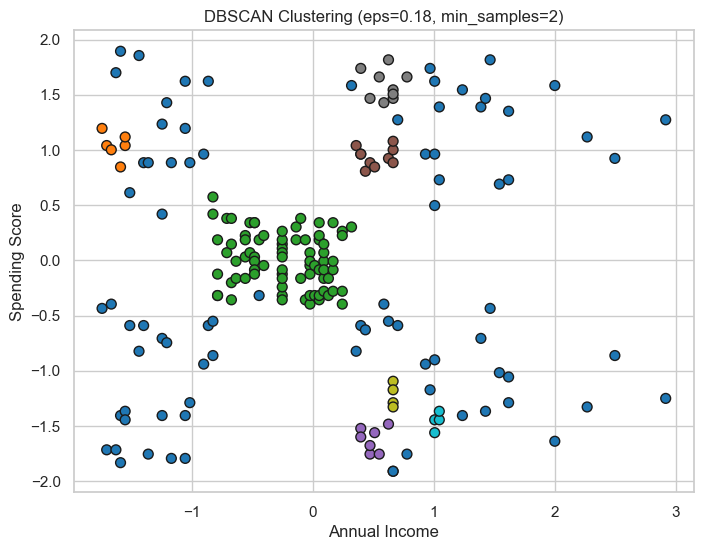

In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.18, min_samples=4)
labels = dbscan.fit_predict(df_dbscan)

plt.figure(figsize=(8,6))
plt.scatter(df_dbscan['Annual Income (k$)'], df_dbscan['Spending Score (1-100)'], 
            c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title('DBSCAN Clustering (eps=0.18, min_samples=2)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [36]:
df['DBSCAN_Cluster'] = labels
print(df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                       62.804878               47.609756
 0                       17.833333               77.000000
 1                       54.487179               50.320513
 2                       73.428571                8.428571
 3                       74.200000               74.400000
 4                       76.333333               91.111111
 5                       78.000000               18.750000
 6                       87.500000               12.750000


In [37]:
df_OPTICS = df_scaled_fit[["Annual Income (k$)", "Spending Score (1-100)"]]
display(df_OPTICS)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


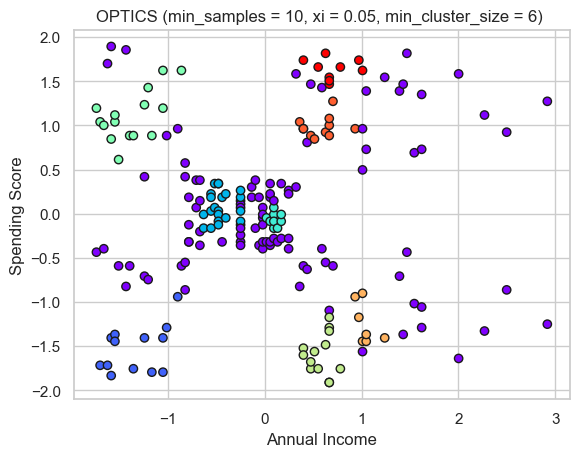

In [61]:

min_samples = 10
xi = 0.05
min_cluster_size = 6
clustering = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size, metric='euclidean')
clustering.fit(df_OPTICS)

labels = clustering.labels_

plt.scatter(df_OPTICS.iloc[:, 0], df_OPTICS.iloc[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title(f"OPTICS (min_samples = {min_samples}, xi = {xi}, min_cluster_size = {min_cluster_size}) ")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from itertools import product
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = df_OPTICS.values
n = len(X)

# ----- Lưới tham số cần thử -----
grid = {
    "min_samples": [3, 5, 10, 20],
    "xi": [0.02, 0.05, 0.1],                 # dùng khi cluster_method='xi'
    "min_cluster_size": [0.02, 0.05, 0.1],   # tỉ lệ theo kích thước mẫu
    "metric": ["euclidean"]                   # có thể thử 'manhattan', 'minkowski'
}

rows = []

for min_samples, xi, mcs, metric in product(
    grid["min_samples"], grid["xi"], grid["min_cluster_size"], grid["metric"]
):
    # chuyển min_cluster_size về số nguyên nếu là tỉ lệ
    mcs_abs = int(np.ceil(mcs * n)) if mcs < 1 else int(mcs)

    model = OPTICS(
        min_samples=min_samples,
        xi=xi,
        min_cluster_size=mcs_abs,
        metric=metric,
        cluster_method="xi"  # dùng xi-extraction để không phải chọn eps
    )
    model.fit(X)
    labels = model.labels_

    # Lọc nhiễu (-1)
    mask = labels != -1
    n_clusters = len(set(labels[mask]))
    noise_ratio = 1 - mask.mean()

    # Bỏ qua cấu hình cho <2 cụm thực
    if n_clusters < 2 or mask.sum() < 20:
        rows.append({
            "min_samples": min_samples, "xi": xi, "min_cluster_size": mcs_abs, "metric": metric,
            "n_clusters": n_clusters, "noise_ratio": noise_ratio,
            "silhouette": np.nan, "calinski_harabasz": np.nan, "davies_bouldin": np.nan
        })
        continue

    X_in = X[mask]
    y_in = labels[mask]

    # Tính chỉ số (cao hơn tốt hơn với silhouette/CH; thấp hơn tốt hơn với DB)
    try:
        sil = silhouette_score(X_in, y_in)
    except Exception:
        sil = np.nan
    try:
        ch = calinski_harabasz_score(X_in, y_in)
    except Exception:
        ch = np.nan
    try:
        db = davies_bouldin_score(X_in, y_in)
    except Exception:
        db = np.nan

    rows.append({
        "min_samples": min_samples, "xi": xi, "min_cluster_size": mcs_abs, "metric": metric,
        "n_clusters": n_clusters, "noise_ratio": noise_ratio,
        "silhouette": sil, "calinski_harabasz": ch, "davies_bouldin": db
    })

results = pd.DataFrame(rows)

# Chuẩn hoá điểm để xếp hạng tổng hợp (DBI càng thấp càng tốt)
rank_sil = results["silhouette"].rank(ascending=False, method="average")
rank_ch  = results["calinski_harabasz"].rank(ascending=False, method="average")
rank_db  = results["davies_bouldin"].rank(ascending=True,  method="average")
results["rank_sum"] = rank_sil.add(rank_ch, fill_value=np.nan).add(rank_db, fill_value=np.nan)

# Sắp xếp & lấy top cấu hình
results_sorted = results.sort_values(["rank_sum", "noise_ratio"], ascending=[True, True])
top5 = results_sorted.head(5)

print("Top 5 cấu hình theo tổng hạng (ưu tiên ít nhiễu):")
print(top5[[
    "min_samples","xi","min_cluster_size","metric",
    "n_clusters","noise_ratio","silhouette","calinski_harabasz","davies_bouldin","rank_sum"
]])

Top 5 cấu hình theo tổng hạng (ưu tiên ít nhiễu):
    min_samples    xi  min_cluster_size     metric  n_clusters  noise_ratio  \
24           10  0.10                 4  euclidean           4        0.790   
16            5  0.10                10  euclidean           7        0.540   
19           10  0.02                10  euclidean           6        0.460   
22           10  0.05                10  euclidean           6        0.470   
30           20  0.05                 4  euclidean           2        0.795   

    silhouette  calinski_harabasz  davies_bouldin  rank_sum  
24    0.720787         510.718194        0.385802      14.0  
16    0.682385         514.148931        0.408949      15.0  
19    0.617385         386.314017        0.462831      31.0  
22    0.617064         379.156438        0.459856      32.0  
30    0.770947         278.832083        0.316239      34.0  


CLUSTERING ON THE BASIS OF 3 FEATURES

In [39]:
display(df)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_Cluster
0,Male,19,15,39,4,-1
1,Male,21,15,81,2,0
2,Female,20,16,6,4,-1
3,Female,23,16,77,2,0
4,Female,31,17,40,4,-1
...,...,...,...,...,...,...
195,Female,35,120,79,1,-1
196,Female,45,126,28,3,-1
197,Male,32,126,74,1,-1
198,Male,32,137,18,3,-1


In [40]:
df_3 = df_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]
display(df_3)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


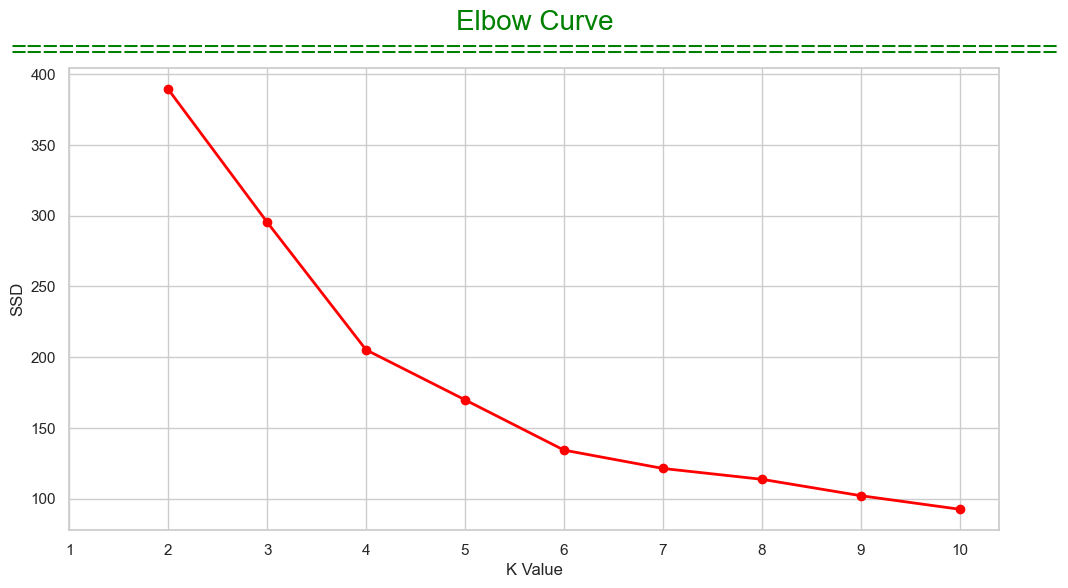

In [41]:
wcss = []
sil_scores = []
K_range = range(2, 11)

for num_clusters in K_range:
    kmeans1 = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans1.fit(df_3)
    pred = kmeans1.predict(df_3)
    score = silhouette_score(df_3, pred)
    
    wcss.append(kmeans1.inertia_)
    sil_scores.append(score)

plt.figure(figsize=(12,6))

plt.plot(range(2,11), wcss, linewidth=2, color="red", marker ="o")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

Best K by silhouette: 6, score = 0.4311


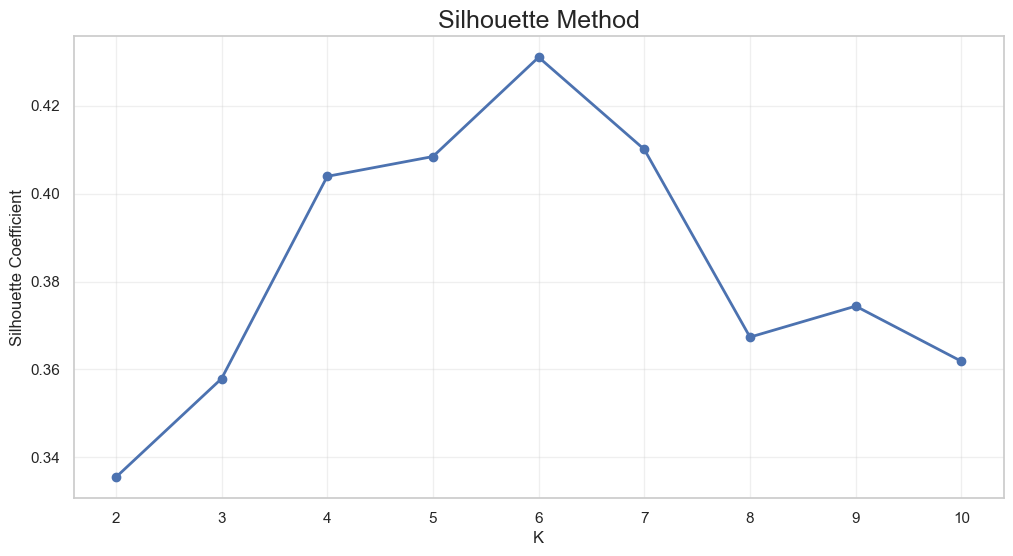

In [42]:
# chọn K tốt nhất theo silhouette (giá trị lớn nhất)
best_k = K_range[int(np.argmax(sil_scores))]
print(f"Best K by silhouette: {best_k}, score = {max(sil_scores):.4f}")

# vẽ đường biến thiên silhouette theo K
plt.figure(figsize=(12,6))
plt.plot(list(K_range), sil_scores, marker='o', linewidth=2)
plt.title("Silhouette Method", fontsize=18)
plt.xlabel("K")
plt.ylabel("Silhouette Coefficient")
plt.xticks(list(K_range))
plt.grid(True, alpha=0.3)
plt.show()

In [43]:
sil_scores_db = []

for eps in np.arange(0.01, 0.2, 0.01):
    for min_samples in range(3, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_dbscan)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps:.2f}, min_samples={min_samples} --> clusters: {n_clusters}, noise: {n_noise}")

eps=0.01, min_samples=3 --> clusters: 0, noise: 200
eps=0.01, min_samples=4 --> clusters: 0, noise: 200
eps=0.01, min_samples=5 --> clusters: 0, noise: 200
eps=0.02, min_samples=3 --> clusters: 0, noise: 200
eps=0.02, min_samples=4 --> clusters: 0, noise: 200
eps=0.02, min_samples=5 --> clusters: 0, noise: 200
eps=0.03, min_samples=3 --> clusters: 0, noise: 200
eps=0.03, min_samples=4 --> clusters: 0, noise: 200
eps=0.03, min_samples=5 --> clusters: 0, noise: 200
eps=0.04, min_samples=3 --> clusters: 6, noise: 179
eps=0.04, min_samples=4 --> clusters: 0, noise: 200
eps=0.04, min_samples=5 --> clusters: 0, noise: 200
eps=0.05, min_samples=3 --> clusters: 6, noise: 179
eps=0.05, min_samples=4 --> clusters: 0, noise: 200
eps=0.05, min_samples=5 --> clusters: 0, noise: 200
eps=0.06, min_samples=3 --> clusters: 9, noise: 162
eps=0.06, min_samples=4 --> clusters: 2, noise: 191
eps=0.06, min_samples=5 --> clusters: 0, noise: 200
eps=0.07, min_samples=3 --> clusters: 9, noise: 162
eps=0.07, mi